# Dawid Przybyliński - Lab1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics

## Przygotowana przeze mnie implementacja sieci neuronej w formie klasy:

In [2]:
class MLP:

    def __init__(self, weights, bias, num_outputs=1, num_hidden=1, activation="sigmoid"):
        self.weights = weights
        self.bias = bias
        self.activation = activation
        self.num_neurons = [weights[0].shape[0]]
        for i in range(len(weights)):
            self.num_neurons.append(weights[i].shape[1])
        self.num_inputs = self.num_neurons[0]
        self.num_hidden = len(weights)-1
        self.num_outputs = self.num_neurons[-1]
        # verify if dimensions are correct
        for i in range(len(weights)-1):
            if(weights[i].shape[1] != weights[i+1].shape[0]):
                print("Weights' dimensions between layers " + str(i) + " and " + str(i+1) + "are incorrect!")
        for i in range(len(bias)):
            if(weights[i].shape[1] != bias[i].size):
                print("Bias size in layer " + str(i) + " is incorrect!")

    @staticmethod
    def sigmoid(x):
        '''
        sigmoid function - used as an activation function
        '''
        return 1 / (1 + np.exp(-x))

    def forward_prop(self, inputs):
        """
        performs forward propagation
        """
        vectorised_f = np.vectorize(self.sigmoid)
        activations = inputs
        for i in range(self.num_hidden):
            outputs = np.dot(activations, self.weights[i]) + self.bias[i]
            activations = vectorised_f(outputs)

        results = np.dot(activations, self.weights[self.num_hidden]) + self.bias[self.num_hidden]
        return results
    
    def show_attributes(self):
        """
        gives basic information about the neural network
        """
        print("Neural Network attributes:")
        print("-------------------------")
        print("Number of neurons in layers: {}".format(self.num_neurons))
        print("Number of predictors: {}".format(self.num_inputs))
        print("Number of hidden layers: {}".format(self.num_hidden))
        print("Number of targets: {}".format(self.num_outputs))
        print("Activations function used: {}".format(self.activation))
        return

Klasa przyjmuje wagi oraz biasy, w formie listy array'ów, ich rozmiar determinuje liczbę warst ukrytych oraz liczbę neuronów w każdej warstwie, które można sprawdzić metodą *show_attributes()*. Wybrać można też funkcję aktywacji, narazie możliwa jest tylko funkcja sigmoidalna. Wymiary macierzy wag oraz biasów są sprawdzane pod kątem możliwości późniejszego ich przemnożania i dodawania. W wypadku wykrycia takiej sytuacji, wyświetlony zostanie stosowny komunikat.

## Pierwszy zbiór: square-simple

In [3]:
train_df = pd.read_csv('~/Documents/Sem6/MIO/datasets/regression/square-simple-training.csv', index_col=0)
test_df = pd.read_csv('~/Documents/Sem6/MIO/datasets/regression/square-simple-test.csv', index_col=0)

In [4]:
train_df['split'] = 'train'
test_df['split'] = 'test'
df = pd.concat([train_df, test_df])
df

,x,y,split
1,-0.171543,-127.351580,train
2,0.025201,-129.942844,train
3,-1.368991,38.672367,train
4,1.907390,197.432191,train
5,0.011129,-129.988852,train
...,...,...,...
96,1.315377,25.719403,test
97,-1.196968,-1.054107,test
98,1.544766,84.767303,test
99,0.441051,-112.492699,test


Text(0.5, 1.0, 'Train split')

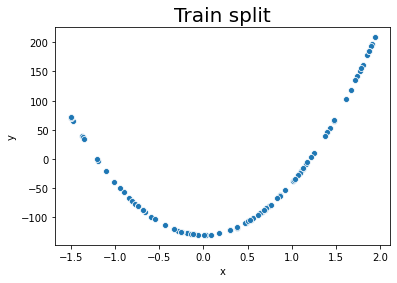

In [5]:
sns.scatterplot(x='x', y='y', data=train_df)
plt.title('Train split', fontsize=20)

### 1 warstwa ukryta z 5 neuronami

In [6]:
weights_1 = [np.array([[1, 1, 1, 1, 1]]), np.array([[900], [200], [0], [-200], [-900]])]
bias_1 = [np.array([-2, -1, 0, 1, 2]), np.array([650])]
mlp_1 = MLP(weights=weights_1, bias=bias_1)
mlp_1.show_attributes()

Neural Network attributes:
-------------------------
Number of neurons in layers: [1, 5, 1]
Number of predictors: 1
Number of hidden layers: 1
Number of targets: 1
Activations function used: sigmoid


Text(0.5, 1.0, 'Train performance')

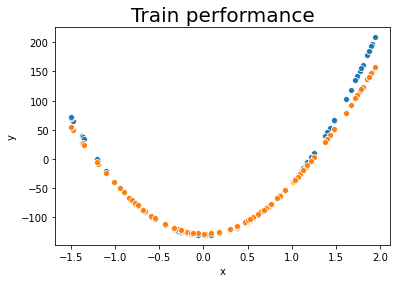

In [7]:
res = mlp_1.forward_prop(np.asarray(train_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=train_df)
sns.scatterplot(x=train_df['x'], y=np.concatenate(res))
plt.title('Train performance', fontsize=20)

In [8]:
metrics.mean_absolute_error(train_df['y'], res)

8.366181727622484

Text(0.5, 1.0, 'Test performance')

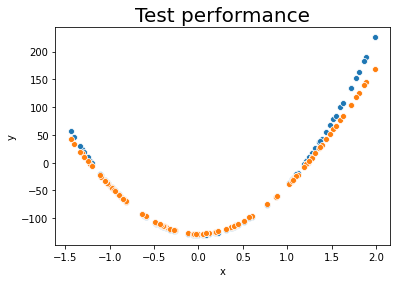

In [9]:
res = mlp_1.forward_prop(np.asarray(test_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=test_df)
sns.scatterplot(x=test_df['x'], y=np.concatenate(res))
plt.title('Test performance', fontsize=20)

In [10]:
metrics.mean_absolute_error(test_df['y'], res)

6.690677439240639

### 1 warstwa ukryta z 10 neuronami

In [11]:
weights_2 = [np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), np.array([[900], [200], [100], [50], [0],[-50], [-100], [-200], [-900], [0]])]
bias_2 = [np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5]), np.array([1050])]
mlp_2 = MLP(weights=weights_2, bias=bias_2)
mlp_2.show_attributes()

Neural Network attributes:
-------------------------
Number of neurons in layers: [1, 10, 1]
Number of predictors: 1
Number of hidden layers: 1
Number of targets: 1
Activations function used: sigmoid


Text(0.5, 1.0, 'Train performance')

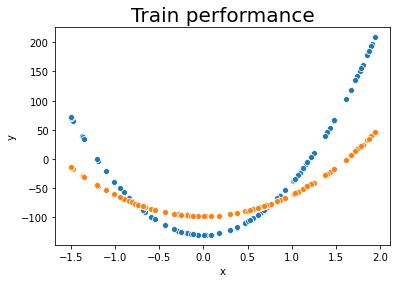

In [12]:
res = mlp_2.forward_prop(np.asarray(train_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=train_df)
sns.scatterplot(x=train_df['x'], y=np.concatenate(res))
plt.title('Train performance', fontsize=20)

In [13]:
metrics.mean_absolute_error(train_df['y'], res)

44.017840598871736

Text(0.5, 1.0, 'Test performance')

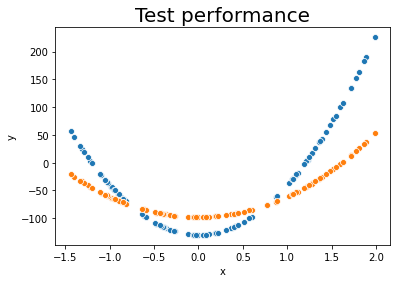

In [14]:
res = mlp_2.forward_prop(np.asarray(test_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=test_df)
sns.scatterplot(x=test_df['x'], y=np.concatenate(res))
plt.title('Test performance', fontsize=20)

In [15]:
metrics.mean_absolute_error(test_df['y'], res)

41.00811067497917

### 2 warstwy ukryte z 5 neuronami każda

Jako że dobranie intuicyjne wag dla więcej niż jednej warstwy ukrytej okazało się trudnym zadaniem, wziąłem losowe wagi z przedziału [-10,10), a biasy losowe z przdziału [0,1) stąd predykcje będą bliskie 0.

In [16]:
weights_3 = [np.random.uniform(-10,10,5).reshape(1,5), np.random.uniform(-10,10,25).reshape(5,5), np.random.uniform(-10,10,5).reshape(5,1)]
bias_3 = [np.random.rand(1,5), np.random.rand(1,5), np.random.rand(1,1)]
mlp_3 = MLP(weights=weights_3, bias=bias_3)
mlp_3.show_attributes()

Neural Network attributes:
-------------------------
Number of neurons in layers: [1, 5, 5, 1]
Number of predictors: 1
Number of hidden layers: 2
Number of targets: 1
Activations function used: sigmoid


Text(0.5, 1.0, 'Train performance')

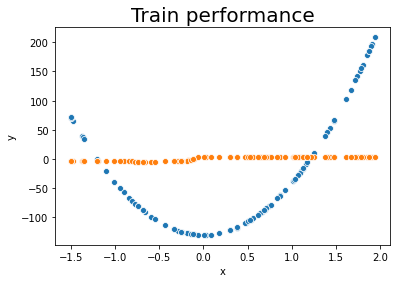

In [17]:
res = mlp_3.forward_prop(np.asarray(train_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=train_df)
sns.scatterplot(x=train_df['x'], y=np.concatenate(res))
plt.title('Train performance', fontsize=20)

In [18]:
metrics.mean_absolute_error(train_df['y'], res)

88.82882712019727

Text(0.5, 1.0, 'Test performance')

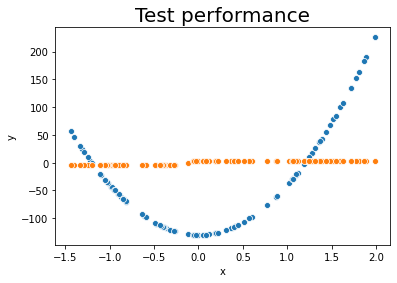

In [19]:
res = mlp_3.forward_prop(np.asarray(test_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=test_df)
sns.scatterplot(x=test_df['x'], y=np.concatenate(res))
plt.title('Test performance', fontsize=20)

## Drugi zbiór: steps-large

In [20]:
train_df = pd.read_csv('/home/szwagier/Documents/Sem6/MIO/datasets/regression/steps-large-training.csv', index_col=0)
test_df = pd.read_csv('/home/szwagier/Documents/Sem6/MIO/datasets/regression/steps-large-test.csv', index_col=0)

In [21]:
train_df['split'] = 'train'
test_df['split'] = 'test'
df = pd.concat([train_df, test_df])
df

,x,y,split
1,-1.481354,-80,train
2,1.033264,80,train
3,-0.076403,0,train
4,-1.419785,-80,train
5,-0.108398,0,train
...,...,...,...
996,-1.374447,-80,test
997,-0.764941,-80,test
998,-0.304863,0,test
999,1.681272,160,test


Text(0.5, 1.0, 'Train split')

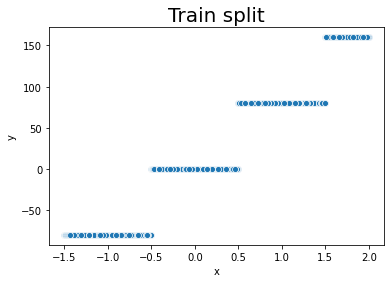

In [22]:
sns.scatterplot(x='x', y='y', data=train_df)
plt.title('Train split', fontsize=20)

### 1 warstwa ukryta z 5 neuronami

In [23]:
weights_4 = [np.array([[100,100,100,0,0]]), np.array([[80], [80], [80], [0], [0]])]
bias_4 = [np.array([-50,-150,50,-50,50]), np.array([-80])]
mlp_4 = MLP(weights=weights_4, bias=bias_4)
mlp_4.show_attributes()

Neural Network attributes:
-------------------------
Number of neurons in layers: [1, 5, 1]
Number of predictors: 1
Number of hidden layers: 1
Number of targets: 1
Activations function used: sigmoid


Text(0.5, 1.0, 'Train performance')

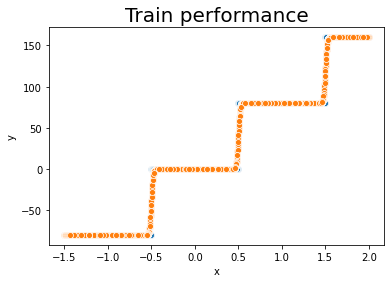

In [24]:
res = mlp_4.forward_prop(np.asarray(train_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=train_df)
sns.scatterplot(x=train_df['x'], y=np.concatenate(res))
plt.title('Train performance', fontsize=20)

In [25]:
metrics.mean_absolute_error(train_df['y'], res)

0.9504525631595238

Text(0.5, 1.0, 'Test performance')

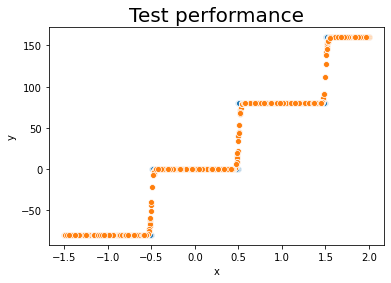

In [26]:
res = mlp_4.forward_prop(np.asarray(test_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=test_df)
sns.scatterplot(x=test_df['x'], y=np.concatenate(res))
plt.title('Test performance', fontsize=20)

In [27]:
metrics.mean_absolute_error(test_df['y'], res)

0.8721515143091529

### 1 warstwa ukryta z 10 neuronami

In [28]:
weights_5 = [np.array([[100,100,100,0,0,0,0,0,0,0]]), np.array([[80], [80], [80], [0], [0], [0], [0], [0], [0], [0]])]
bias_5 = [np.array([-50,-150,50,-50,50,-50,50,-50,50,-50]), np.array([-80])]
mlp_5 = MLP(weights=weights_5, bias=bias_5)
mlp_5.show_attributes()

Neural Network attributes:
-------------------------
Number of neurons in layers: [1, 10, 1]
Number of predictors: 1
Number of hidden layers: 1
Number of targets: 1
Activations function used: sigmoid


Text(0.5, 1.0, 'Train performance')

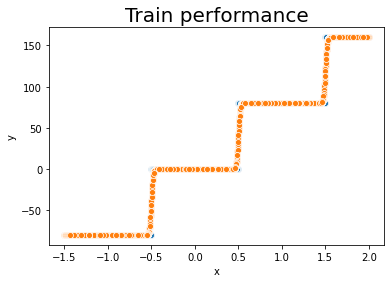

In [29]:
res = mlp_5.forward_prop(np.asarray(train_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=train_df)
sns.scatterplot(x=train_df['x'], y=np.concatenate(res))
plt.title('Train performance', fontsize=20)

In [30]:
metrics.mean_absolute_error(train_df['y'], res)

0.9504525631595238

Text(0.5, 1.0, 'Test performance')

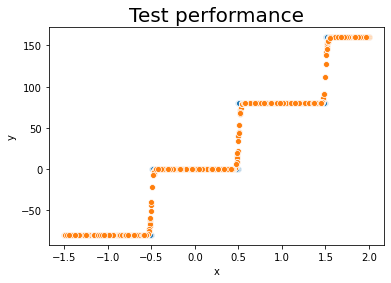

In [31]:
res = mlp_5.forward_prop(np.asarray(test_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=test_df)
sns.scatterplot(x=test_df['x'], y=np.concatenate(res))
plt.title('Test performance', fontsize=20)

In [32]:
metrics.mean_absolute_error(test_df['y'], res)

0.8721515143091529

### 2 warstwy ukryte z 5 neuronami każda

In [33]:
weights_6 = [np.random.uniform(-10,10,5).reshape(1,5), np.random.uniform(-10,10,25).reshape(5,5), np.random.uniform(-10,10,5).reshape(5,1)]
bias_6 = [np.random.rand(1,5), np.random.rand(1,5), np.random.rand(1,1)]
mlp_6 = MLP(weights=weights_6, bias=bias_6)
mlp_6.show_attributes()

Neural Network attributes:
-------------------------
Number of neurons in layers: [1, 5, 5, 1]
Number of predictors: 1
Number of hidden layers: 2
Number of targets: 1
Activations function used: sigmoid


Text(0.5, 1.0, 'Train performance')

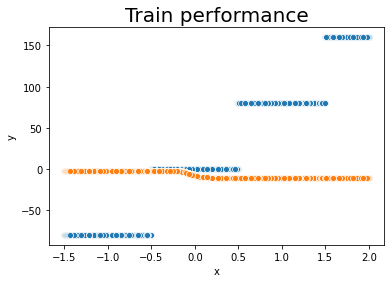

In [34]:
res = mlp_6.forward_prop(np.asarray(train_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=train_df)
sns.scatterplot(x=train_df['x'], y=np.concatenate(res))
plt.title('Train performance', fontsize=20)

In [35]:
metrics.mean_absolute_error(train_df['y'], res)

75.12196361466955

Text(0.5, 1.0, 'Test performance')

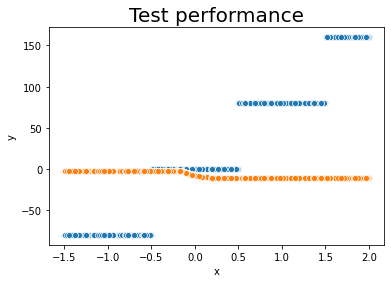

In [36]:
res = mlp_6.forward_prop(np.asarray(test_df['x']).reshape(-1,1))
sns.scatterplot(x='x', y='y', data=test_df)
sns.scatterplot(x=test_df['x'], y=np.concatenate(res))
plt.title('Test performance', fontsize=20)

In [37]:
metrics.mean_absolute_error(test_df['y'], res)

75.32700008774113

## Podsumowanie

Dopasowywanie wag ręcznie jest czasochłonne i staje się trudne w przypadku kilku warstw ukrytych, jednak widoczne jest iż sieci neuronowe, w przypadku dobrego trenowania, mają potencjał bycia bardzo dobrymi predyktorami.